In [1]:
import numpy as np
from PIL import Image
 
from matplotlib import pyplot as plt
 
import scipy.io as sio
 
import numpy as np
import cv2 
import pyrealsense2 as rs
from threading import Thread
import time

from utils_camera import MyRealSense, CVCamera

In [2]:
!v4l2-ctl --list-devices

Streaming Camera W2G: Streaming (usb-0000:00:14.0-3.1):
	/dev/video2
	/dev/video3
	/dev/media1

USB2.0 HD UVC WebCam: USB2.0 HD (usb-0000:00:14.0-9):
	/dev/video0
	/dev/video1
	/dev/media0

Intel(R) RealSense(TM) Depth Ca (usb-0000:3a:00.0-1):
	/dev/video4
	/dev/video5
	/dev/video6
	/dev/video7
	/dev/video8
	/dev/video9
	/dev/media2
	/dev/media3



In [3]:
cam_wrist=MyRealSense()
cam_front=CVCamera(2)

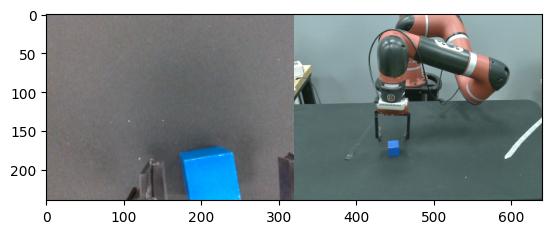

In [6]:
st=time.time()
image_wrist=cam_wrist.get_current_frame()
image_front=cam_front.get_current_frame(scale=0.5)
image=np.concatenate([image_wrist, image_front], axis=1)
dt=time.time()-st

image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image)

In [5]:
dt, 1/dt

(0.5334258079528809, 1.874674950275996)

In [5]:
image_wrist.shape, image_front.shape

((240, 320, 3), (480, 640, 3))

In [6]:
image_wrist.shape

(240, 320, 3)

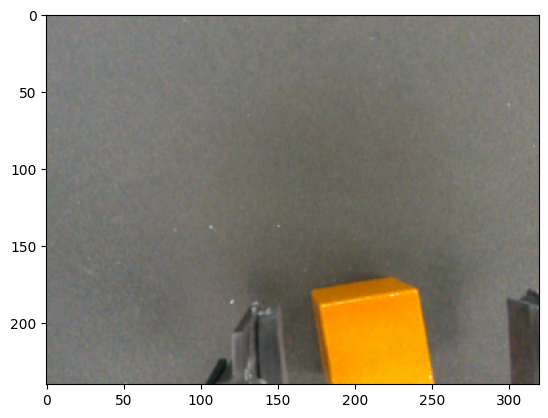

In [7]:
plt.imshow(image_wrist)

In [5]:
images=[]
st=time.time()
while cam_front.isalive and cam_wrist.isalive:
     
    image_wrist=cam_wrist.get_current_frame()  
    image_front=cam_front.get_current_frame()     
    
    image=np.concatenate([image_wrist, image_front], axis=1)
    images.append(image) 

    cv2.imshow('frame',image)
    if cv2.waitKey(1) == 27: 
        break  # esc to quit
cv2.destroyAllWindows()    
dt=time.time()-st

dt, len(images), 1/dt

(24.901882648468018, 747, 0.04015760631903551)

In [9]:
fps=len(images) / dt
print('fps=', fps)

fps= 30.278218208519515


In [6]:
cam_wrist.close()
cam_front.close()